
----------
## Комментарий от ревьюера

Привет! Меня зовут Дарья, я буду твоим ревьюером по этому проекту. Работа получилась очень хорошая, проект зачтен :) В целом, ты хорошо справился с анализом данных, построением моделей и кластеризацией. Ниже в проекте я оставила несколько замечаний на будущее: в основном они касаются построения графиков.

Мои комментарии в файле будут оформлены как этот, ты сможешь найти их по заголовку «Комментарий от ревьюера». 

Комментарий к заданию, выполненному на отлично, будет __<font color='green'>зеленым</font>__. \
__<font color='blue'>Синим</font>__ цветом будут выделены комментарии к заданиям, в которых ты всё сделал правильно, но есть незначительные неточности или у меня есть предложения по улучшению. \
Если какое-то задание я пока не могу принять, комментарий будет помечен __<font color='red'>красным</font>__. 

---------


# Шаг 0. Введение

### Задачи проекта:

- научиться прогнозировать вероятность оттока для каждого клиента
- сформировать типичные портреты пользователей
- проанализировать основные признаки, наиболее сильно влияющие на отток
- разработать рекомендации по повышению качества работы с клиентами

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv('/datasets/gym_churn.csv', sep=',')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Шаг 1. Предобработка данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропусков нет, типы столбцов определены верно

In [5]:
df.duplicated().value_counts()

False    4000
dtype: int64

----------
<font color='green'>

## Комментарий от ревьюера

Да, отлично :) Стоило также проверить наличие дубликатов.    
    
</font>

---------

# Шаг 2. Исследовательский анализ данных

Изучим средние значения и стандартные отклонения признаков

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Вглянем на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
df.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

----------
<font color='green'>

## Комментарий от ревьюера

Увидели средние в разрезе по группам, отлично. </font><font color='blue'> Не хватает описания результатов: есть ли признаки, которые значительно различаются для ушедших и оставшихся? Или группы идентичны?
    
</font>

---------

Построим столбчатые гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fcb7c4290> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fcb76ced0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f3fcb6c9050> instances.
A proxy artist may be used instead.
Se

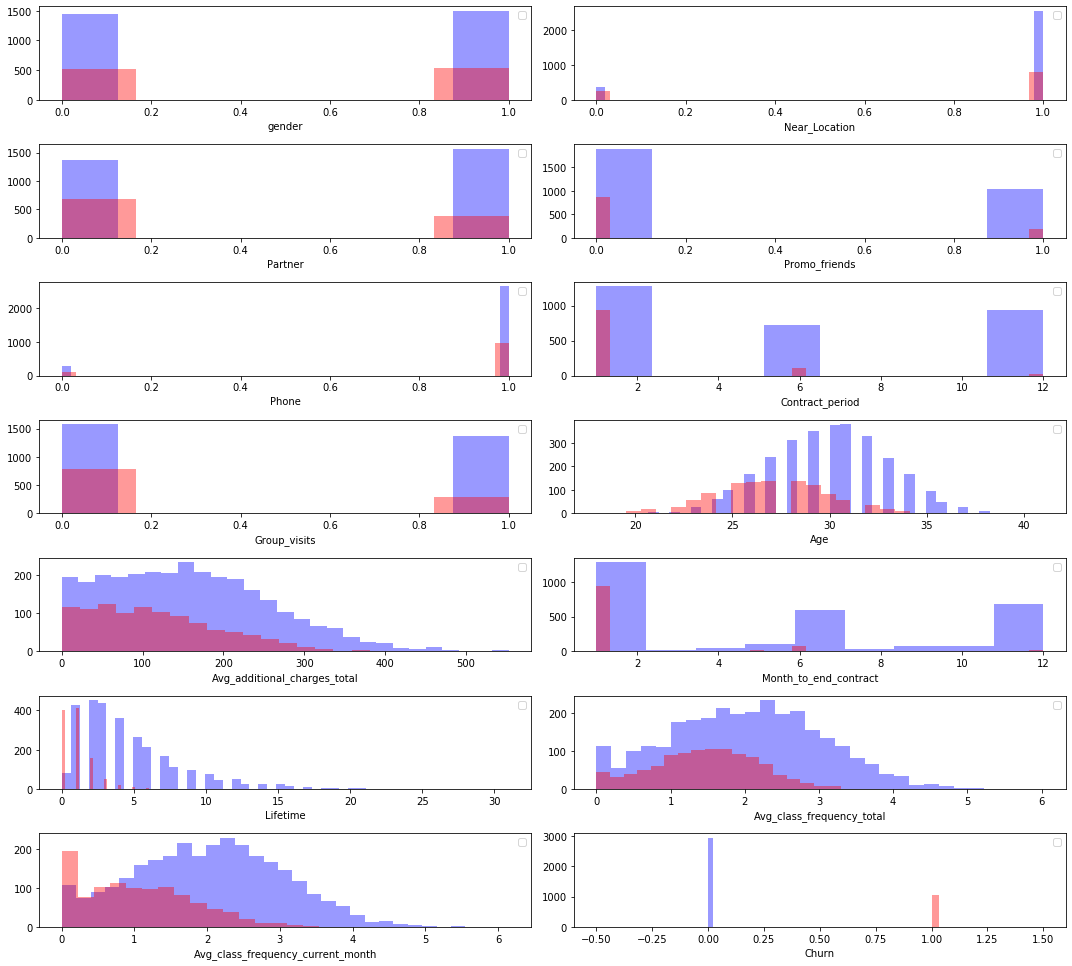

In [9]:
fig, ax = plt.subplots(figsize = (15, 15))
for i, col in enumerate(df.columns):
    plt.subplot(8, 2, i+1)
    
    df0 = df[df.Churn == 0]
    plot1=sns.distplot(df0[col], label=col,  color="b",  kde=False,ax=plt.gca())
    
    df1 =df[df.Churn ==1]
    plot2=sns.distplot(df1[col], label=col, color="r" ,  kde=False,ax=plt.gca())
    plt.legend(handles=[plot1,plot2],labels=['0','1'])
      
plt.tight_layout()
#plt.legend(handles=['0','1'])

----------
<font color='green'>

## Комментарий от ревьюера

Отличные графики, очень наглядно :) </font><font color='blue'>Стоило добавить легенду (``plt.legend()``) - сейчас понять, к какой группе относятся распределения, можно только сравнив с графиком для Churn. И, опять же, очень не хватает вывода :) 
    
Также нужна нормализация данных: в нашей выборке разное количество клиентов в двух группах, из-за чего масштаб у графиков тоже разный. Для непрерывных признаков это можно сделать с помощью опции ``kde=True``; для дискретных - посчитать и вывести долю объектов с определенным значением от всех объектов (или воспользоваться методом ``.histogram(..., histnorm='probability')`` из библиотеки ``plotly.express``).      
    
</font>

---------

Построим матрицу корреляций признаков

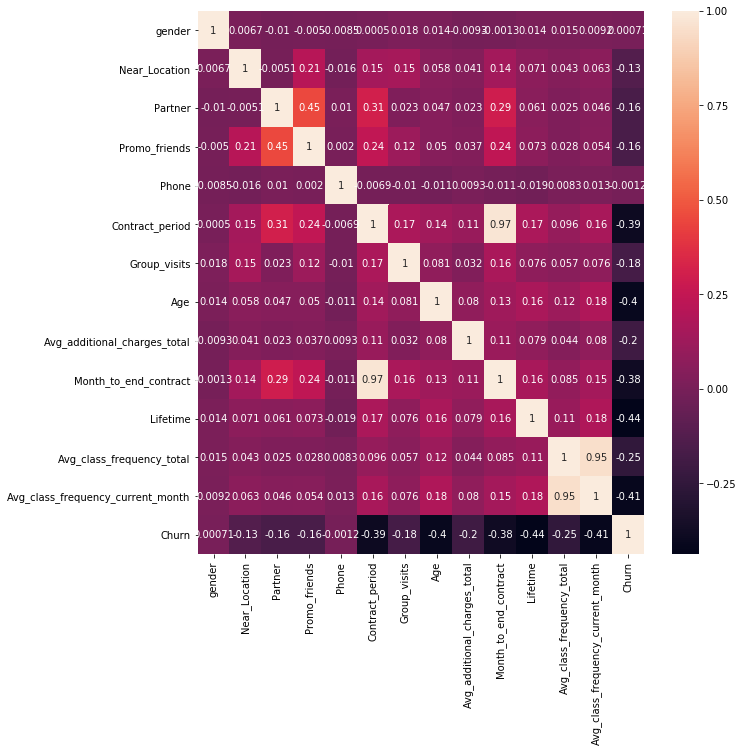

In [10]:
plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True)

Заментных факторов, влияющих на отток, не обнаружено

----------
<font color='green'>

## Комментарий от ревьюера

Окей, корреляцию посчитали :) Можно было еще подписать значения корреляции в клетках с помощью опции ``.heatmap(..., annot=True)``
    
</font>

---------

# Шаг 3. Модель прогнозирования оттока пользователей

Построим модели бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце

Используем логистическую регрессию

In [11]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
threshold = 0.266
probabilities = model.predict_proba(X_test)[:,1]
custom_predictions = [0 if i<threshold else 1 for i in probabilities]
predictions=custom_predictions

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.74
Recall: 0.90
F1: 0.81


Используем случайный лес

In [105]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.83
Recall: 0.78
F1: 0.81


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Сравнивая метрики двух моделей, можно сказать, что логистическая регрессия справилась лучше

----------
<font color='green'>

## Комментарий от ревьюера

Верно, логистическая регрессия здесь работает лучше :) Разделение выборки и обучение моделей сделаны правильно.
    
</font>

---------

# Шаг 4. Кластеризация пользователей

Стандартизируем данные

In [106]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму

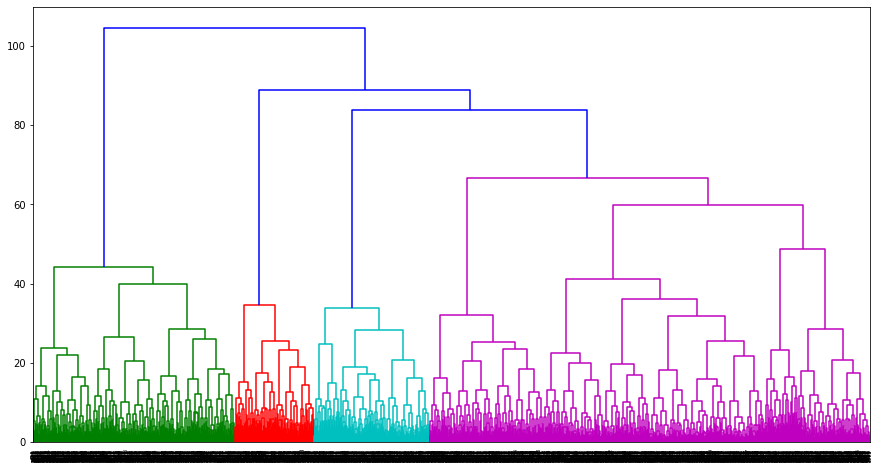

In [107]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 8))  
dendrogram(linked, orientation='top')
plt.show()

Обучим модель кластеризации, число кластеров примем равным 5 

----------
<font color='green'>

## Комментарий от ревьюера

Окей, разумное решение.
    
</font>

---------

In [108]:
km = KMeans(random_state=0, n_clusters = 5) 
labels =  km.fit_predict(X_sc)

Посмотрим на средние значения признаков для кластеров

In [109]:
df['clusters'] = labels
samm=df.groupby('clusters').mean()
samm

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
clusters,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Построим распределения признаков для кластеров

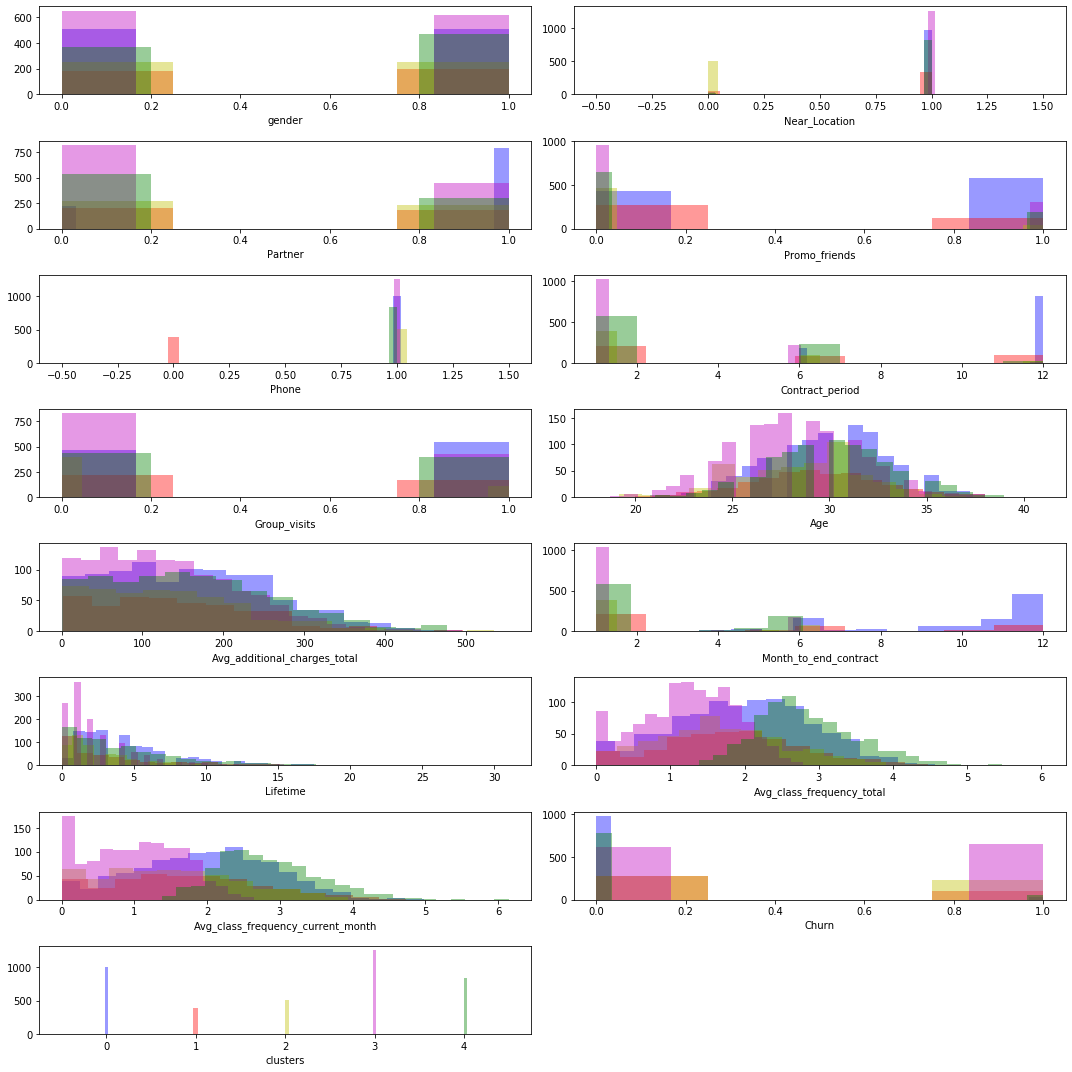

In [110]:
fig, ax = plt.subplots(figsize = (15, 15))
for i, col in enumerate(df.columns):
    plt.subplot(8, 2, i+1)    
    sns.distplot(df[df.clusters ==0][col], label=col, color="b",kde=False,ax=plt.gca())
    sns.distplot(df[df.clusters ==1][col], label=col, color="r",kde=False,ax=plt.gca())
    sns.distplot(df[df.clusters ==2][col], label=col, color="y",kde=False,ax=plt.gca())
    sns.distplot(df[df.clusters ==3][col], label=col, color="m",kde=False,ax=plt.gca())
    sns.distplot(df[df.clusters ==4][col], label=col, color="g",kde=False,ax=plt.gca())
      
plt.tight_layout()

----------
<font color='blue'>

## Комментарий от ревьюера

Здесь те же замечания, что и для предыдущих гистограмм: не хватает легенды и нормализации.
    
</font>

---------

Для каждого полученного кластера посчитаем долю оттока 

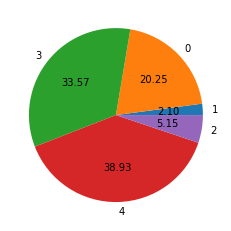

In [111]:
plot =plt.pie(df.groupby('clusters')['Churn'].mean(),  labels=df['clusters'].unique(),autopct='%.2f')

Четвертый и третий кластер оказались наиболее подвержены оттоку, первый - наименее

----------
<font color='green'>

## Комментарий от ревьюера

Отлично, значит, можно проанализировать, какие факторы влияют на отток :)
    
</font>

---------

Посмотрим чем они принципиально отличаются

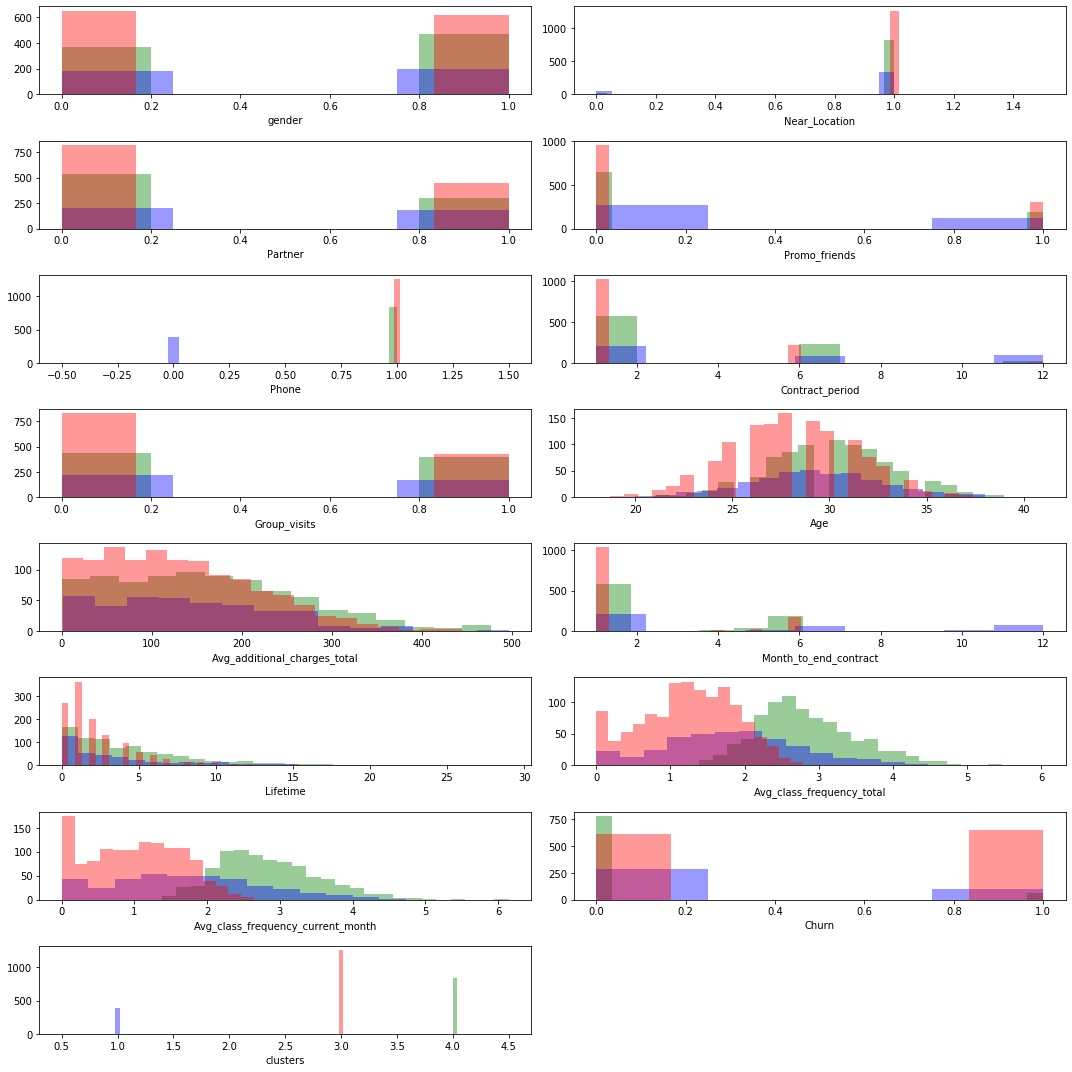

In [112]:
fig, ax = plt.subplots(figsize = (15, 15))
for i, col in enumerate(df.columns):
    plt.subplot(8, 2, i+1)
    sns.distplot(df[df.clusters ==4][col], label=col,  color="g",  kde=False,ax=plt.gca())
    sns.distplot(df[df.clusters ==1][col], label=col, color="b" ,  kde=False,ax=plt.gca())
    sns.distplot(df[df.clusters ==3][col], label=col, color="r" ,  kde=False,ax=plt.gca())  
plt.tight_layout()

На значительный отток в третьем и четвертом кластере вероятно повлияли такие факты:
- клиенты реже является сотрудником компании партнера
- с клиентами заключены более короткие договоры
- клиенты нечасто посещали групповые занятия
- более низкая средняя частота посещений
- клиенты реже участвововали в акции «приведи друга»

----------
<font color='green'>

## Комментарий от ревьюера

Окей, хороший сравнительный анализ :)
    
</font>

---------

# Шаг 5. Заключение

Исходя из обнаруженных взаимосвязей, для снижения оттока клиентов можно рекомендовать:
- заключать больше партнерских контрактов
- стимулировать посещение групповых занятий (интересные программы, харизматичные тренеры)
- предлагать скидки при заключени договора на год и пол года
- чаще анонсировать акции

----------
<font color='green'>

## Комментарий от ревьюера

Отличные рекомендации! Спасибо за работу, твой анализ определенно был бы полезным для бизнеса :)
    
</font>

---------